### Logistic Regression:
    classification problem, we are trying to predict results in a
    discrete output. In other words, we are trying to map input variables into
    discrete categories.
    
    Online Shoppers Purchasing Intention Dataset

In [1]:
import os
os.getcwd()
os.chdir(r"C:\Users\sajit\OneDrive\Desktop\Project")

In [2]:
# Class attribute is our target (y) here its 'Revenue'

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import pandas as pd
data = pd.read_csv(r"online_shoppers_intention.csv")

In [4]:
data.shape

(12330, 18)

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [8]:
#initial data description
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [9]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# Checking Duplicate Value
data.duplicated().sum()

125

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
df=data.copy()

In [5]:
# Drop Duplicate Values
df=data.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

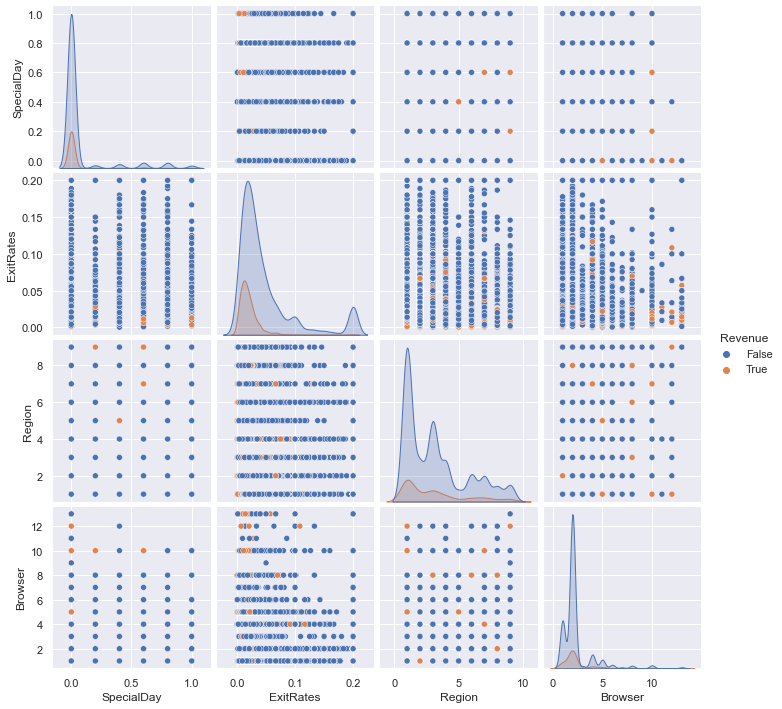

In [489]:
sns.pairplot(df,diag_kind='kde',hue='Revenue',vars=['SpecialDay','ExitRates','Region','Browser']);

In [57]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

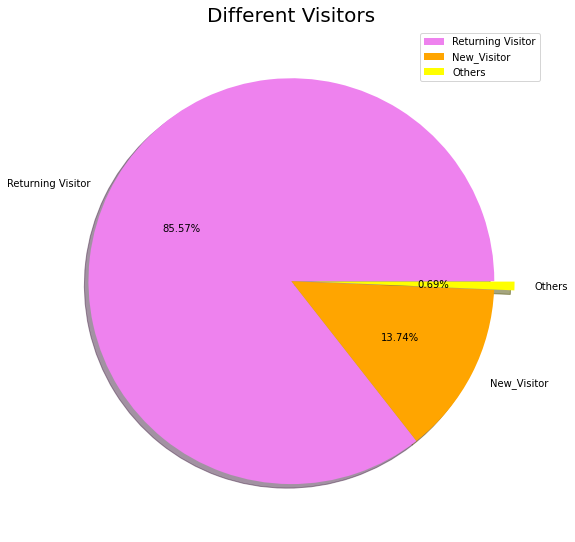

In [58]:
# The percentage of different visitors in Variable -VisitorType 

plt.rcParams['figure.figsize'] = (20, 10)
size = [10551, 1694, 85]
colors = ['violet', 'orange', 'yellow']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()


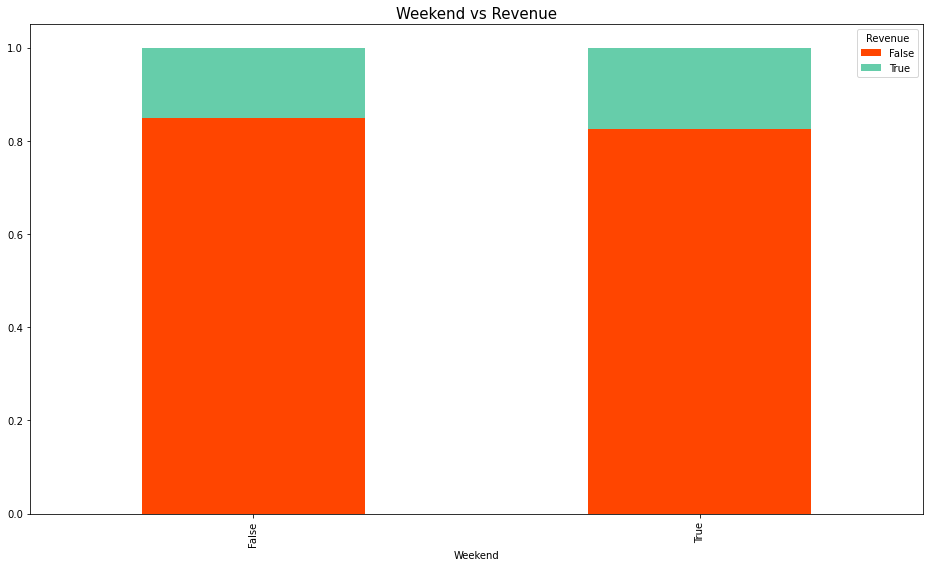

In [79]:
df1 = pd.crosstab(df['Weekend'], df['Revenue'])
df1.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (16, 9), color = ['orangered', 'mediumaquamarine'])
plt.title('Weekend vs Revenue', fontsize = 15)
plt.show()

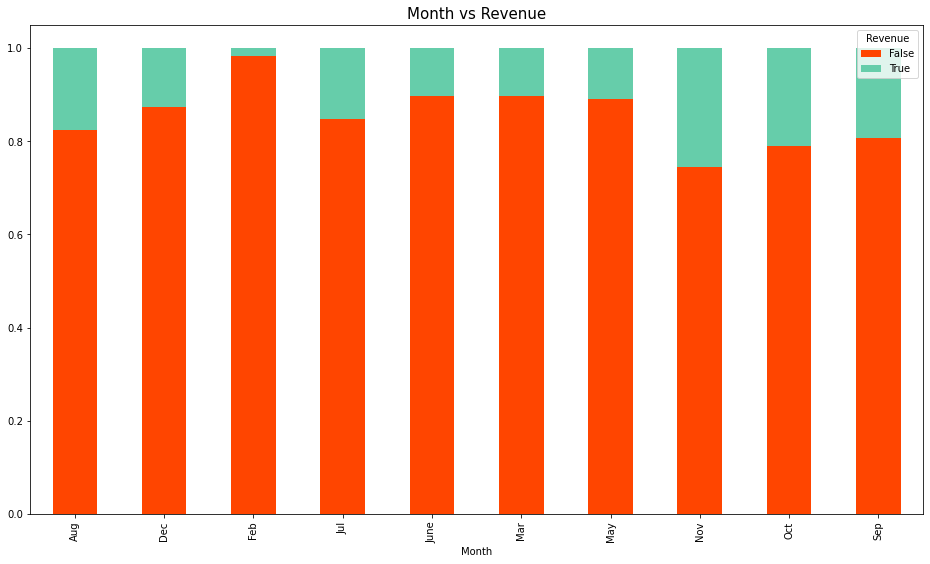

In [101]:
df2 = pd.crosstab(df['Month'], df['Revenue'])
df2.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (16, 9), color = ['orangered', 'mediumaquamarine'])
plt.title('Month vs Revenue', fontsize = 15)
plt.show()

In [16]:
# Converting my Target to Categorical Variable 
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)

df.tail()

C:\Users\sajit\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,1,0


No: 10422
Yes: 1908


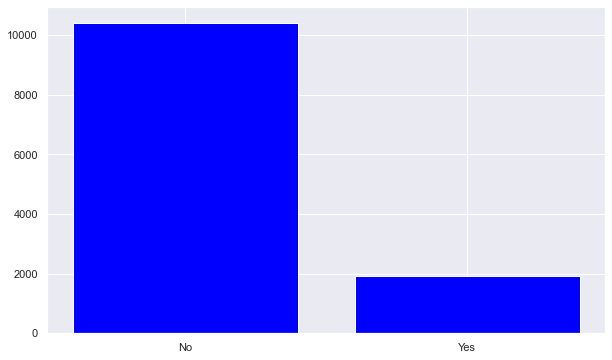

In [491]:
# Visualization of my Target Variable
plt.figure(figsize=(10,6))
print('No:',len(df[df.Revenue == 0]))
print('Yes:',len(df[df.Revenue == 1]))
yax = len(df[df.Revenue == 0]),len(df[df.Revenue == 1])
xax = ['No','Yes']
plt.bar(xs,ys,color = 'blue')
plt.show()

In [17]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Let’s now begin to train the Logistic Regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Revenue column

In [6]:
# Extract dependent & Independent Variable
X=df.drop(['Revenue','Month','VisitorType','Weekend'],axis=1)
y=df.iloc[:,17]
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [104]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int32

In [20]:
y.value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

In [7]:
#Shuffle the dataset for proper sampling 

df= df.sample(frac=1,random_state=1)

<AxesSubplot:>

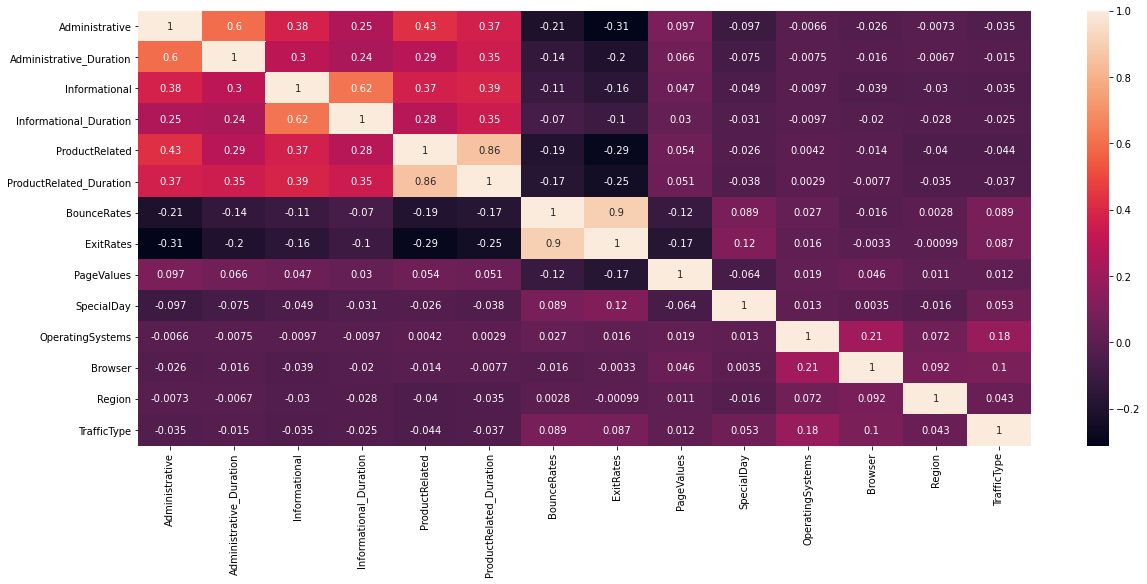

In [32]:
#Corr Relation with Numeric Variable
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(X.corr(),annot=True)

In [22]:
#Feature description
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


### Feature Scalling

In [8]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

X_scaled=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895


### Now let’s split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model

In [9]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.25)
X_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
874,0.000000,0.000000,0.000000,0.000000,0.007092,0.001485,0.200000,0.600000,0.000000,0.0,0.142857,0.083333,0.000,0.000000
1091,0.000000,0.000000,0.208333,0.005492,0.043972,0.011733,0.037037,0.184788,0.000000,0.0,0.142857,0.083333,0.000,0.052632
11604,0.111111,0.012210,0.000000,0.000000,0.007092,0.001075,0.000000,0.187500,0.000000,0.0,0.000000,0.083333,0.000,0.368421
11914,0.259259,0.112321,0.000000,0.000000,0.097872,0.040626,0.059028,0.172728,0.015370,0.0,0.000000,0.000000,0.000,0.052632
8426,0.111111,0.015447,0.000000,0.000000,0.197163,0.057442,0.010714,0.059487,0.048391,0.0,0.142857,0.083333,0.125,0.473684


In [10]:
# Doing k-fold Validation Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

0.8713632661529876

In [11]:
# # Validating the Model 

model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
model.intercept_

array([-1.5982808])

In [29]:
model.coef_

array([[ 0.43741212, -0.02207935,  0.38184241,  0.3483242 ,  1.90452205,
         1.63279815, -0.77993027, -3.72288698, 17.32583288, -0.93998428,
        -0.61809634,  0.27682495, -0.21451826,  0.12483107]])

In [30]:
#Test Accuracy
model.score(X_test,y_test)

0.8745085190039319

In [12]:
#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       False       0.88      0.99      0.93      2580
        True       0.79      0.26      0.39       472

    accuracy                           0.87      3052
   macro avg       0.83      0.62      0.66      3052
weighted avg       0.86      0.87      0.85      3052



array([[2547,   33],
       [ 350,  122]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

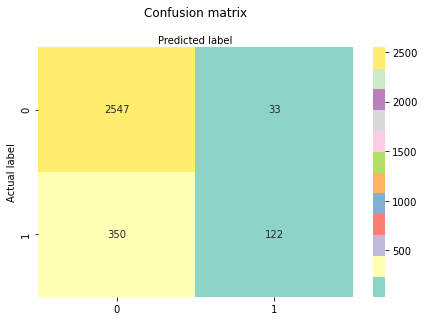

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

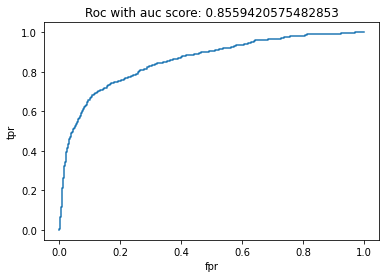

In [18]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= model.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

In [ ]:
Conclusion :
    
    The closer the score to 1, the better. If the score is near 0.5, it means that Logistic Regression is not a good fit 
    for the data. Either we need to get more discriminative features to help identify 
    the target class or look for other model options (may be a complex non-linear model)
    Our Model analysis value is .855 which is a good fit and can be considered even be considered for real world modelling.
